Practice with pandas and iris data

***See the documentation of pandas and the links in the Canvas page for pandas ***

 ( From the documentation at https://archive.ics.uci.edu/dataset/53/iris )

Attributes:

   - sepal length: 4.3 ..  7.9,

   - sepal width: 2.0 .. 4.4,
   
   - petal length: 1.0 .. 6.9,
   
   - petal width: 0.1 .. 2.5

Class Distribution: 33.3% for each of 3 classes.

# Open the file and basics

In [ ]:
# practice #1
import pandas as pd
import numpy as np

# you have to have the file uploaded on colab or you could mount your google drive
# you need the header none otherwise it assumes first row is a header

# or you could try the following: Launches upload dialog (uncomment)
#from google.colab import files
#uploaded = files.upload()   #will bring up the file upload dialog


In [ ]:
df = pd.read_csv('iris.csv',header=None)

# the file has no column headers, so add headers
df.columns = ['x1', 'x2', 'x3', 'x4', 'labels']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      150 non-null    float64
 1   x2      150 non-null    float64
 2   x3      150 non-null    float64
 3   x4      150 non-null    float64
 4   labels  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.head(10)

,x1,x2,x3,x4,labels
0,5.7,2.9,4.2,1.3,2
1,4.8,3.0,1.4,0.3,1
2,5.0,3.2,1.2,0.2,1
3,6.5,3.0,5.8,2.2,3
4,7.2,3.6,6.1,2.5,3
5,5.5,2.4,3.7,1.0,2
6,6.1,2.8,4.0,1.3,2
7,6.7,2.5,5.8,1.8,3
8,6.0,2.7,5.1,1.6,2
9,7.1,3.0,5.9,2.1,3


In [ ]:
df.describe()

,x1,x2,x3,x4,labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [ ]:
# access first two rows
# df[:2]
# it is better to use loc or iloc, see documentation
df.iloc[5:10]

,x1,x2,x3,x4,labels
5,5.5,2.4,3.7,1.0,2
6,6.1,2.8,4.0,1.3,2
7,6.7,2.5,5.8,1.8,3
8,6.0,2.7,5.1,1.6,2
9,7.1,3.0,5.9,2.1,3


In [ ]:
# what are the columns in the data?
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'labels'], dtype='object')

In [ ]:
df['labels'].unique()

array([2, 1, 3])

In [ ]:
# label distribution (count for each label) by first selecting the 'labels' column
df['labels'].value_counts()

,count
labels,
2,50
1,50
3,50


In [ ]:
# average (mean) of first column from the data
df['x1'].mean()

5.843333333333334

# Labels and Data with numpy

In [ ]:
# get the labels and turn into numpy array
labels = df['labels'].to_numpy()

# get the 4 cols of data also into numpy array
iris = df[['x1','x2','x3','x4']].to_numpy()

print(iris.shape) # shape of a 2-d array
print(len(labels)) # length of a 1-d array

(150, 4)
150


In [ ]:
# mean of all points (rows) will return a 1d array (4-by-1)
# axis 0 --> per column, axis 1 --> per row
m = np.mean(iris, axis = 0)
print(m)

[5.84333333 3.054      3.75866667 1.19866667]


In [ ]:
# show distribution of labels (another way from above with pandas)
# a number of rows for each label
lblrange = range(1, 4)
for lbl in lblrange:
    print('Num with label of {}: {}'.format(lbl, len(labels [labels == lbl] )) )

#or in list comprehension
#print([len(labels [labels == lbl])  for lbl in lblrange] )

Num with label of 1: 50
Num with label of 2: 50
Num with label of 3: 50


In [ ]:
# mean of points that correspond to label 1 only
# still returns a 1d array (4-by-1) but it is the mean of 50 points, not 150
# labels == 1 is a logical (true/false) array and acts as a condition
# to index the 2-d array for each row or record
label1_iris = iris [labels==1,:]
print(label1_iris.shape)
m1 = np.mean(label1_iris, axis=0)
print(m1)

(50, 4)
[5.006 3.418 1.464 0.244]


In [ ]:
# for reference, the same but instead using a loop to do the sum
# (without using numpy functions)
# for practice only, it is better not to use loops in python
# and use numpy functions when you can
# Yet it is good to know both ways:)
sum1 = np.zeros(4)
for i in range(150):
  if labels[i]==1:
    sum1 = sum1 + iris[i,:]
print(sum1 / 50)

[5.006 3.418 1.464 0.244]


# plots

In [3]:
import matplotlib.pyplot as plt

# see the matplot lib documentation for colors, markers, plot()
plt.plot(iris[:,2], iris[:,3], '.')
plt.title('Iris Dataset')
plt.xlabel('x2')
plt.ylabel('x3')
plt.show()

NameError: name 'iris' is not defined

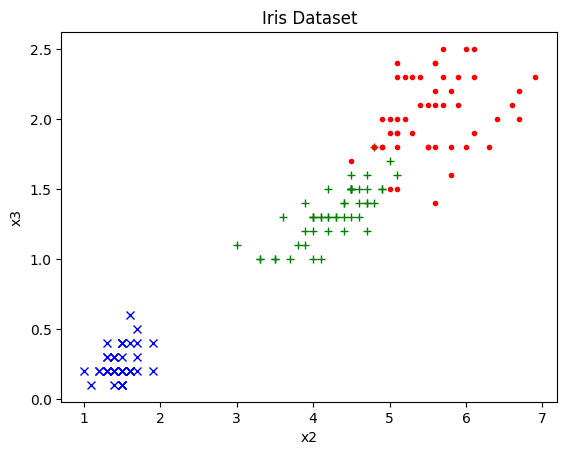

In [ ]:

# see the matplot lib documentation for colors, markers, plot()
condition1 = labels==1
condition2 = labels==2
condition3 = labels==3
plt.plot(iris[condition1,2], iris[condition1,3], 'bx')
plt.plot(iris[condition2,2], iris[condition2,3], 'g+')
plt.plot(iris[condition3,2], iris[condition3,3], 'r.')
plt.title('Iris Dataset')
plt.xlabel('x2')
plt.ylabel('x3')
plt.show()

In [2]:
#using pandas dataframes and map()
colors = {1:'red', 2:'green', 3:'blue'}
plt.scatter(df['x1'], df['x3'], 20, df['labels'].map(colors))
plt.title('Iris Dataset')
plt.xlabel('x1')
plt.ylabel('x3')
plt.show()

NameError: name 'plt' is not defined